<a href="https://colab.research.google.com/github/vishnudas-raveendran/PGP-AIML/blob/master/ComputerVision/Project2/CV_Project_2_PartB_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)
import numpy as np
from PIL import Image as im
import pandas as pd

2.8.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder. [ Score: 2 points ]

In [2]:
!pwd
%cd '/content/drive/MyDrive/GL Project Dataset/'
!pwd

/content
/content/drive/MyDrive/GL Project Dataset
/content/drive/MyDrive/GL Project Dataset


#### Extract the zip file [ Score: 2 points ]
- Extract Aligned Face Dataset from Pinterest.zip

In [9]:
images_zip_path = "Aligned Face Dataset from Pinterest - CV project 2.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall('/content/extracted/')

In [2]:
%cd '/content/extracted'

/content/extracted


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [3]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [4]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image [ Score: 2 points ]
- Load one image using the function "load_image"

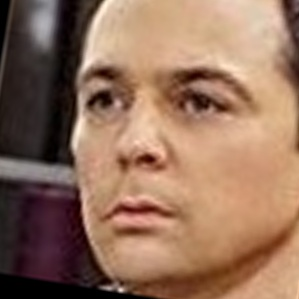

In [5]:
img_path = load_image('/content/extracted/PINS/pins_Jim Parsons/Jim Parsons100.jpg')
im.fromarray(img_path)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model [ Score: 2 points ]
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [7]:
model = vgg_face()
model.load_weights('/content/drive/MyDrive/GL Project Dataset/Part 2 - vgg_face_weights.h5')

### Get vgg_face_descriptor

In [8]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [9]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


#### Generate embeddings for all images  [ Score: 3 points ]
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [10]:
def get_embedding(imgPath):
  #print(imgPath)
  img = load_image(imgPath)
  
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  return embedding_vector

In [ ]:
import time

for i in range(10):
  p = (100)/10770
  print("", end=f"\rPercentComplete: {str(round(p*100,2))} %")
  time.sleep(0.2)
  #print(str(round(p*100))+"% \r")

In [11]:
embeddings = np.zeros((metadata.shape[0], 2622))
percent_complete = 0.0
for i, m in enumerate(metadata):
  percent_complete = round((i/metadata.shape[0])*100,2)
  print("", end=f"\rPercent Completed: {str(percent_complete)} %")
  try:
    embedding_vector = get_embedding(m.image_path())
  except:
    embedding_vector = np.zeros((2622))
  embeddings[i] = embedding_vector

Percent Completed: 99.99 %

In [13]:
## SInce running embeddings take lot of time lets save them
import pickle
with open('/content/drive/MyDrive/GL Project Dataset/face_embeddings','wb') as f: pickle.dump(embeddings, f)

with open('/content/drive/MyDrive/GL Project Dataset/face_embeddings','rb') as f: embeddingsL = pickle.load(f)


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [14]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

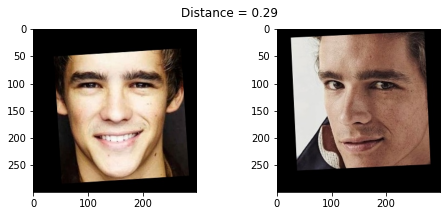

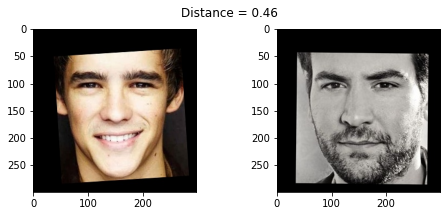

In [15]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

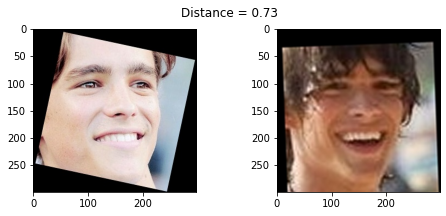

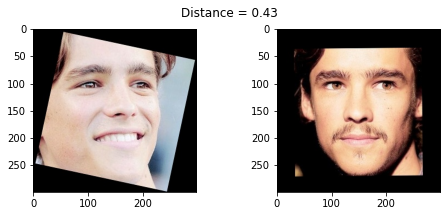

In [16]:
show_pair(30, 31)
show_pair(30, 100)

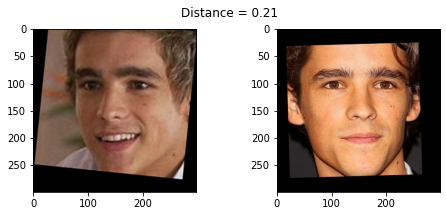

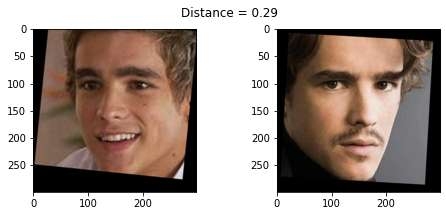

In [17]:
show_pair(70, 72)
show_pair(70, 115)

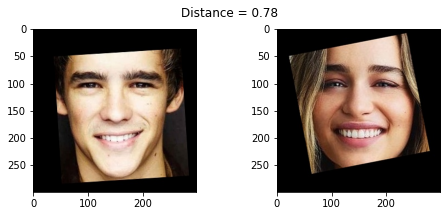

In [18]:
show_pair(2, 400)

#### Create train and test sets [ Score: 2 points ]
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [25]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities

#### Add your code here ####
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]
#### Add your code here ####

#### Encode the Labels  [ Score: 2 points ]
- Encode the targets
- Use LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
y_train = lencoder.fit_transform(y_train)
y_test = lencoder.transform(y_test)

#### Standardize the feature values [ Score: 2 points ]
- Scale the features using StandardScaler

In [27]:
# Standarize features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9640768588137009

#### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [40]:
def preprocess_input(imgPath):
  embeddings = get_embedding(imgPath)
  embeddings = std.transform([embeddings])
  embeddings = pca.transform(embeddings)
  return embeddings

def do_face_recognition(imgPath):
  embeddings = preprocess_input(imgPath)
  p = svc.predict(embeddings)
  person = lencoder.inverse_transform(p)
  return person[0].replace('pins_','')




### Test1: Benedict Cumberbatch

In [48]:
testImgPath1 ='/content/Benedict+Cumberbatch9.jpg'
t1_person_predicted = do_face_recognition(testImgPath1)

### Test2: Dawyne Johnson

In [49]:
testImgPath2 ='/content/Dwayne+Johnson4.jpg'
t2_person_predicted = do_face_recognition(testImgPath2)

### Test3: Emma Watson

In [56]:
testImgPath3 ='/content/emma_watson.jpeg'
t3_person_predicted = do_face_recognition(testImgPath3)

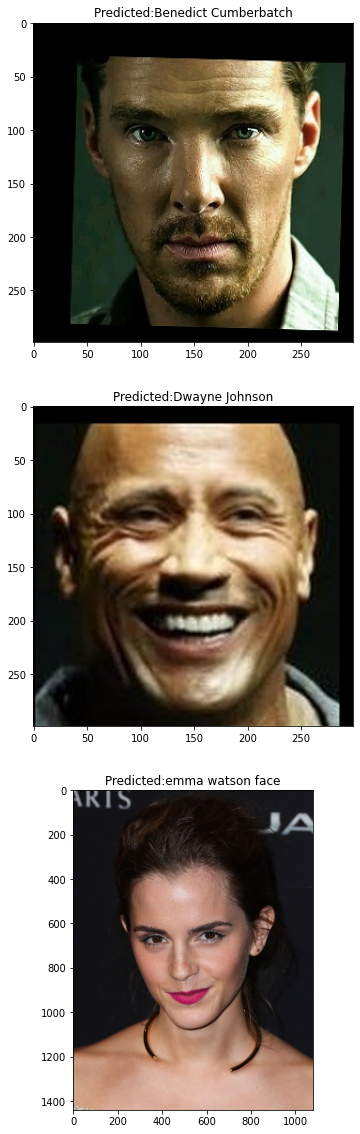

In [64]:
fig, axes = plt.subplots(3,1);
fig.set_figheight(20)
fig.set_figwidth(20)
axes[0].imshow(load_image(testImgPath1))
axes[0].set_title('Predicted:'+t1_person_predicted)
axes[1].imshow(load_image(testImgPath2))
axes[1].set_title('Predicted:'+t2_person_predicted)
axes[2].imshow(load_image(testImgPath3))
axes[2].set_title('Predicted:'+t3_person_predicted);

## Misc: Save as HTML

In [65]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [68]:
%cd '/content/drive/MyDrive/Colab Notebooks/'
!jupyter nbconvert --to html 'CV Project 2_PartB_Face_Recognition.ipynb'

/content/drive/MyDrive/Colab Notebooks
[NbConvertApp] Converting notebook CV Project 2_PartB_Face_Recognition.ipynb to html
[NbConvertApp] Writing 1755923 bytes to CV Project 2_PartB_Face_Recognition.html
